In [1]:
import os
os.chdir(datasetdir)

# import the needed packages
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras as keras
import numpy as np
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datasetdir = r'C:\Users\abdul\Desktop\ContentLab\P2\DeepFashion\Train'
batch_size = 3

def DataLoad(shape, preprocessing): 
    '''Create the training and validation datasets for 
    a given image shape.
    '''
    imgdatagen = ImageDataGenerator(
        preprocessing_function = preprocessing,
        horizontal_flip = True, 
        validation_split = 0.1,
    )

    height, width = shape

    train_dataset = imgdatagen.flow_from_directory(
        os.getcwd(),
        target_size = (height, width), 
        classes = ['Blazer', 'Blouse', 'Cardigan', 'Dress', 'Jacket',
                 'Jeans', 'Jumpsuit', 'Romper', 'Shorts', 'Skirts', 'Sweater', 'Sweatpants', 'Tank', 'Tee', 'Top'],
        batch_size = batch_size,
        subset = 'training', 
    )

    val_dataset = imgdatagen.flow_from_directory(
        os.getcwd(),
        target_size = (height, width), 
        classes = ['Blazer', 'Blouse', 'Cardigan', 'Dress', 'Jacket',
                 'Jeans', 'Jumpsuit', 'Romper', 'Shorts', 'Skirts', 'Sweater', 'Sweatpants', 'Tank', 'Tee', 'Top'],
        batch_size = batch_size,
        subset = 'validation'
    )
    return train_dataset, val_dataset

In [3]:
vgg16 = keras.applications.vgg16
conv_model = vgg16.VGG16(weights='imagenet', include_top=False)
conv_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [4]:
train_dataset, val_dataset = DataLoad((224,224), preprocessing=vgg16.preprocess_input)
# Function for plots images with labels within jupyter notebook
X_train, y_train = next(train_dataset)

# X_train = X_train / 255.0


# X_train=np.asarray(X_train)


classes = np.array(['Blazer', 'Blouse', 'Cardigan', 'Dress', 'Jacket',
                    'Jeans', 'Jumpsuit', 'Romper', 'Shorts', 'Skirts', 'Sweater', 'Sweatpants', 'Tank', 'Tee', 'Top'])
# # #classes=np.array(classes)
# # classes = classes.astype('int64')

# # print(classes)

Found 7656 images belonging to 15 classes.
Found 842 images belonging to 15 classes.


In [5]:
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train[i], cmap=plt.cm.binary)
#     plt.xlabel(classes[y_train[i]])
# plt.show()

In [6]:
conv_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))


In [7]:
# flatten the output of the convolutional part: 
x = keras.layers.Flatten()(conv_model.output)
# three hidden layers
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
# final softmax layer with 15 categories
predictions = keras.layers.Dense(15, activation='softmax')(x)

# creating the full model:
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
for layer in conv_model.layers:
    layer.trainable = False

In [9]:
full_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
full_model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.001),
                  metrics=['acc'])
history = full_model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=0,
    epochs=3,
)


Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2552 steps, validate for 281 steps
Epoch 1/3
2552/2552 [==============================] - 125s 49ms/step - loss: 0.2182 - acc: 0.9345 - val_loss: 0.1864 - val_acc: 0.9374
Epoch 2/3
2552/2552 [==============================] - 110s 43ms/step - loss: 0.1550 - acc: 0.9462 - val_loss: 0.1934 - val_acc: 0.9369
Epoch 3/3
2552/2552 [==============================] - 110s 43ms/step - loss: 0.1300 - acc: 0.9537 - val_loss: 0.1794 - val_acc: 0.9409


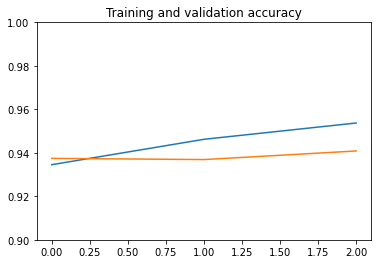

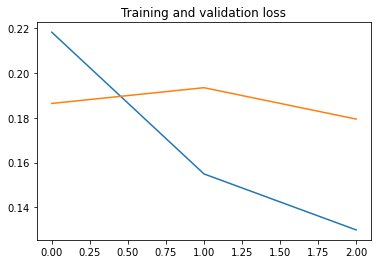

In [23]:
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    
    plt.show()
    
plot_history(history, yrange=(0.9,1))




In [106]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_dir=r'C:\Users\abdul\Desktop\ContentLab\P2\DeepFashion\Test'
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=3, class_mode='categorical')
X_test, y_test = next(test_generator)

Testresults = full_model.evaluate(test_generator)
print("test loss, test acc:", Testresults)

Found 1009 images belonging to 15 classes.
  ...
    to  
  ['...']
337/337 [==============================] - 12s 37ms/step - loss: 0.2960 - acc: 0.9309
test loss, test acc: [0.2960212954136236, 0.93088776]


In [154]:
classes = ['Blazer', 'Blouse', 'Cardigan', 'Dress', 'Jacket',
                 'Jeans', 'Jumpsuit', 'Romper', 'Shorts', 'Skirts', 'Sweater', 'Sweatpants', 'Tank', 'Tee', 'Top']

[[3.2168441e-02 4.1302413e-04 5.5150846e-05 1.1025868e-05 4.1316987e-05
  9.1204822e-01 3.5051263e-03 2.7213749e-04 2.2469976e-03 1.2469624e-07
  5.5194175e-04 4.7285795e-02 2.0268255e-04 2.1721514e-04 9.8077266e-04]]


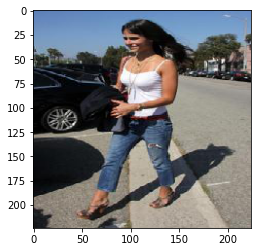

In [155]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

img_path = r'C:\Users\abdul\Desktop\ContentLab\P2\DeepFashion\Test\Jeans\img_00000052.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
c=full_model.predict(x)
print(c)
plt.imshow(img)

In [156]:
def get_class_string_from_index(index):
   for class_string, class_index in test_generator.class_indices.items():
      if class_index == index:
         return class_string
    
Predicted_Class=np.argmax(c, axis = 1)
print('Predicted_Class is:', Predicted_Class)     #Get the rounded value of the predicted class
true_index = 5
# print('true_label is:', true_labels)     #Get the rounded value of the predicted class
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(Predicted_Class))


Predicted_Class is: [5]
True label: Jeans
Predicted label: Jeans


In [159]:
# Calculating number of misclassified images
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=3, class_mode='categorical')
X_test, y_test = next(test_generator)
X_test=X_test/255
preds = full_model.predict(X_test)
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(y_test, axis=1)
print (pred_labels)
print (true_labels)

Found 1009 images belonging to 15 classes.
[12  2 12]
[8 2 2]


In [160]:
mispred_img = X_test[pred_labels!=true_labels]
mispred_true = true_labels[pred_labels!=true_labels]
mispred_pred = pred_labels[pred_labels!=true_labels]
print ('number of misclassified images:', mispred_img.shape[0])

number of misclassified images: 2


In [161]:
def plot_img_results(array, true, pred, i, n=1):
    # plot the image and the target for sample i
    ncols = 3
    nrows = n/ncols + 1
    fig = plt.figure( figsize=(ncols*2, nrows*2), dpi=100)
    for j in range(n):
      index = j+i
      plt.subplot(nrows,ncols, j+1)
      plt.imshow(array[index])
      plt.title('true: {} pred: {}'.format(true[index], pred[index]))
      plt.axis('off')

C:\Users\abdul\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


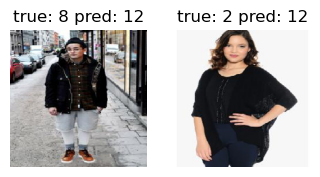

In [162]:
plot_img_results(mispred_img, mispred_true, mispred_pred, 0, len(mispred_img))


In [163]:
# To get the labels as names:
classes[13]

'Tee'

Found 1009 images belonging to 15 classes.


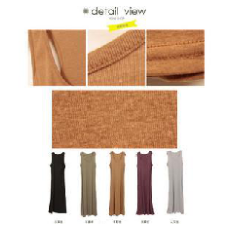

True label: Tank
Predicted label: Tank


In [170]:
# Selecting images from any test_dataset and classify it
def get_class_string_from_index(index):
   for class_string, class_index in test_generator.class_indices.items():
      if class_index == index:
         return class_string
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=7, class_mode='categorical')
X_test, y_test = next(test_generator)
X_test=X_test/255
image = X_test[1]
true_index = np.argmax(y_test[1])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the image to (1, 224, 224, 3) before predicting the label
prediction_scores = full_model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

[[7.6918673e-07 1.8377342e-07 9.1568567e-05 8.8927388e-10 5.5985629e-07
  1.5946045e-11 8.9255985e-11 3.6273806e-09 9.9990499e-01 4.2226604e-13
  1.5184708e-06 4.9611635e-09 4.2491880e-08 5.0487984e-08 2.4704102e-07]]


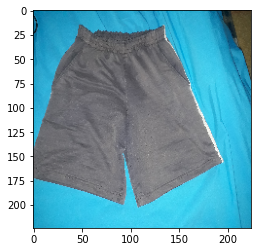

In [213]:
# Testing on Camera images

img_path = r'C:\Users\abdul\Desktop\ContentLab\P2\Data\p\20210226_222826.jpg'
img = image.load_img(img_path, target_size=(224,224,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
c=full_model.predict(x)
print(c)
plt.imshow(img)

In [214]:
Predicted_Class=np.argmax(c, axis = 1)
print('Predicted_Class is:', Predicted_Class)     #Get the rounded value of the predicted class

Predicted_Class is: [8]


In [215]:
classes[8]

'Shorts'